# Blind Search

## Problem

- S : Start state
- E : Goal state

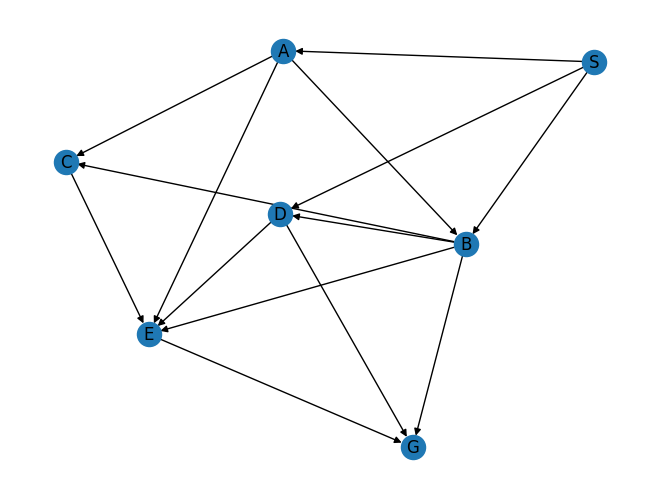

In [5]:
import networkx as nx

G=nx.DiGraph()
G.add_edges_from([('S','A'),('S','B'), ('S', 'D'),('A','B'),('A','C'),('A','E'),('B','C'),('B','D'),('B','E'),('B','G'),('C','E'),('D','E'),('D','G'),('E','G')])
nx.draw_kamada_kawai(G,with_labels=True)

### BFS : Breadth First Search

- Expand the shallowest nodes
- Fringe -> Queue

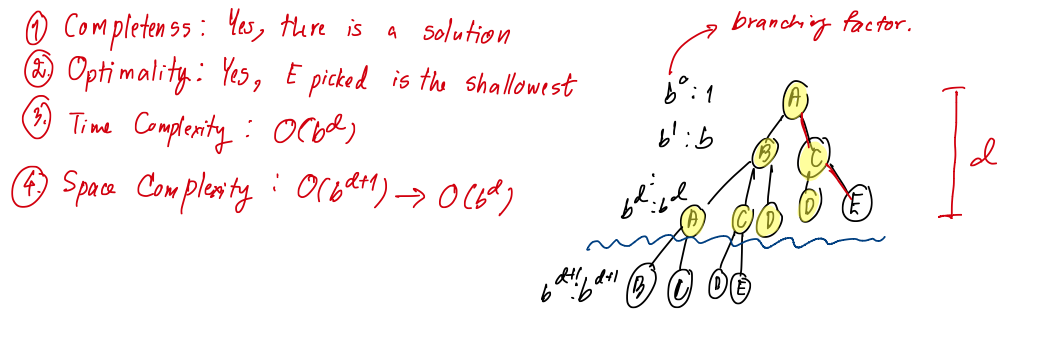

Search in a graph configured by `graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}`

In [9]:
last_index = 0
visited_node = {}
graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}

# node : (state, node_index, parent_index, level)

# Generate successors
def gen_successors(node):
    global last_index
    global graph
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    parent_id = node[1]
    level = node[3] + 1
    successors = []
    for state in graph[node[0]]:
        successors += [(state, last_index + 1, parent_id, level)]
        last_index += 1
    return successors

# Check if it's goal state
def is_goal(node):
    if node[0] == 'G':
        return True

# Expand successors
def insert_all(node, fringe):
    # gen successors
    successors = gen_successors(node)
    for successor in successors:
        fringe.append(successor)
    print(f'Updated fringe: {fringe}')

# Show result
def show_result(node):
    global visited_node
    current_node = node
    while True:
        print(current_node[0], end=' ')
        parent_id = current_node[2]
        # Stop if parent is root
        if parent_id == -1:
            break
        # Point to parent
        current_node = visited_node[parent_id]

# BFS
def bfs(start_node):
    global last_index
    global visited_node
    # Initializations
    last_index = 0
    visited_node = {}
    fringe = [start_node]
    
    while True:
        # Check if fringe is empty
        if len(fringe) == 0:
            print('No solution')
            break
        # Pop first node, and remove it from fringe
        # front_node = fringe.pop(0)
        front_node = fringe[0]
        fringe = fringe[1:]
        # Store visited node
        visited_node[front_node[1]] = front_node
        # Check if it's goal state
        if is_goal(front_node):
            print('Found Solution')
            show_result(front_node)
            return True
        # Expand successors
        insert_all(front_node, fringe)

# Run BFS
bfs(('S', 0, -1, 0))

Updated fringe: [('A', 1, 0, 1), ('B', 2, 0, 1), ('D', 3, 0, 1)]
Updated fringe: [('B', 2, 0, 1), ('D', 3, 0, 1), ('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2)]
Updated fringe: [('D', 3, 0, 1), ('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2)]
Updated fringe: [('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2)]
Updated fringe: [('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3)]
Updated fringe: [('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3), ('E', 17, 5, 3)]
Updated fringe: [('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 

True

### DFS : Depth First Search

- Fringe -> Stack

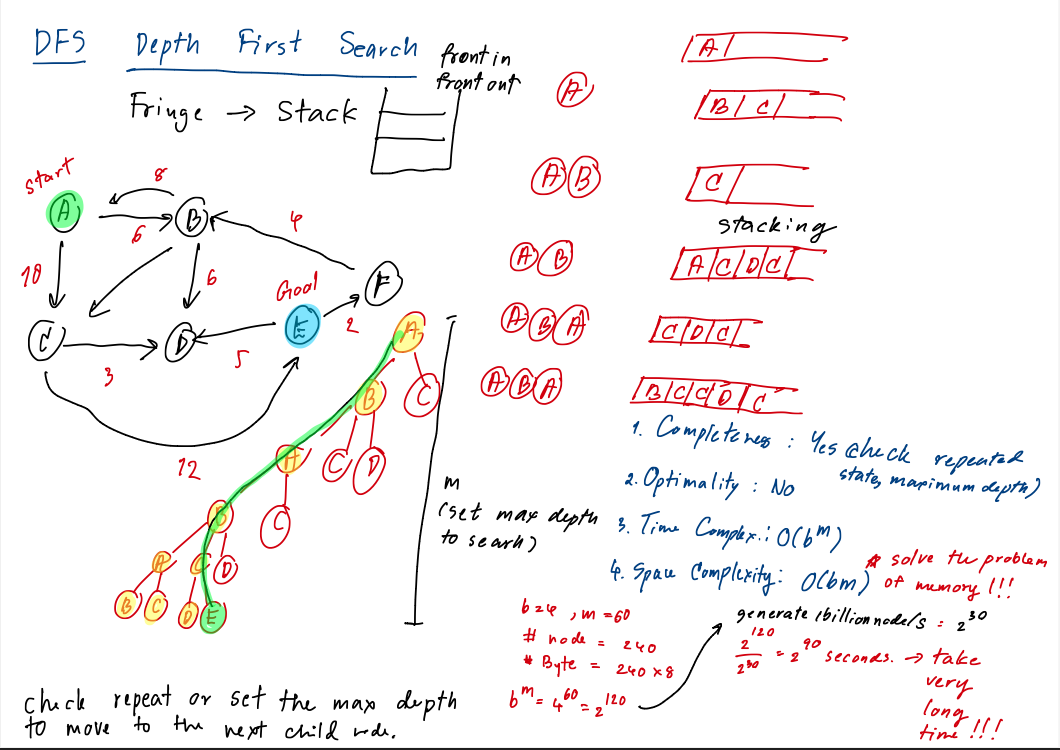

In [14]:
last_index = 0
visited_node = {}
graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}

# node : (state, node_index, parent_index, level)

# Generate successors
def gen_successors(node):
    global last_index
    global graph
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}

    successors = []
    for state in graph[node[0]]:
        successors += [(state, last_index + 1, node[1], node[3] + 1)]
        last_index += 1
    return successors

# Check if it's goal state
def is_goal(node):
    if node[0] == 'G':
        return True

# Expand successors
def insert_all(node, fringe):
    # gen successors
    successors = gen_successors(node)
    for successor in successors:
        # Stack successor
        fringe[0:0] = [successor]      # fringe.append(successor)
    print(f'Updated fringe: {fringe}')

# Show result
def show_result(node):
    global visited_node
    current_node = node
    while True:
        print(current_node[0], end=' ')
        parent_id = current_node[2]
        # Stop if parent is root
        if parent_id == -1:
            break
        # Point to parent
        current_node = visited_node[parent_id]

# DFS
def dfs(start_node, limited_level):
    global last_index
    global visited_node
    # Initializations
    last_index = 0
    visited_node = {}
    fringe = [start_node]
    print(f'Initial fringe: {fringe}')
    while True:
        # Check if fringe is empty
        if len(fringe) == 0:
            print('No solution')
            break
        # Pop first node, and remove it from fringe
        front_node = fringe[0]
        fringe = fringe[1:]
        # Store visited node
        visited_node[front_node[1]] = front_node
        # Check if it's goal state
        if is_goal(front_node):
            print('Found Solution')
            show_result(front_node)
            return True
        # Limit depth
        if front_node[3] == limited_level:
            continue
        insert_all(front_node, fringe)

# Run DFS
# limit
i = 3
print('Limit at level '+str(i))
dfs(('S',0,-1,0),i)

Limit at level 3
Initial fringe: [('S', 0, -1, 0)]
Updated fringe: [('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Updated fringe: [('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Found Solution
G D S 

True

### IDS : Iterative Deepening Search

- combine advantage of breadth + depth

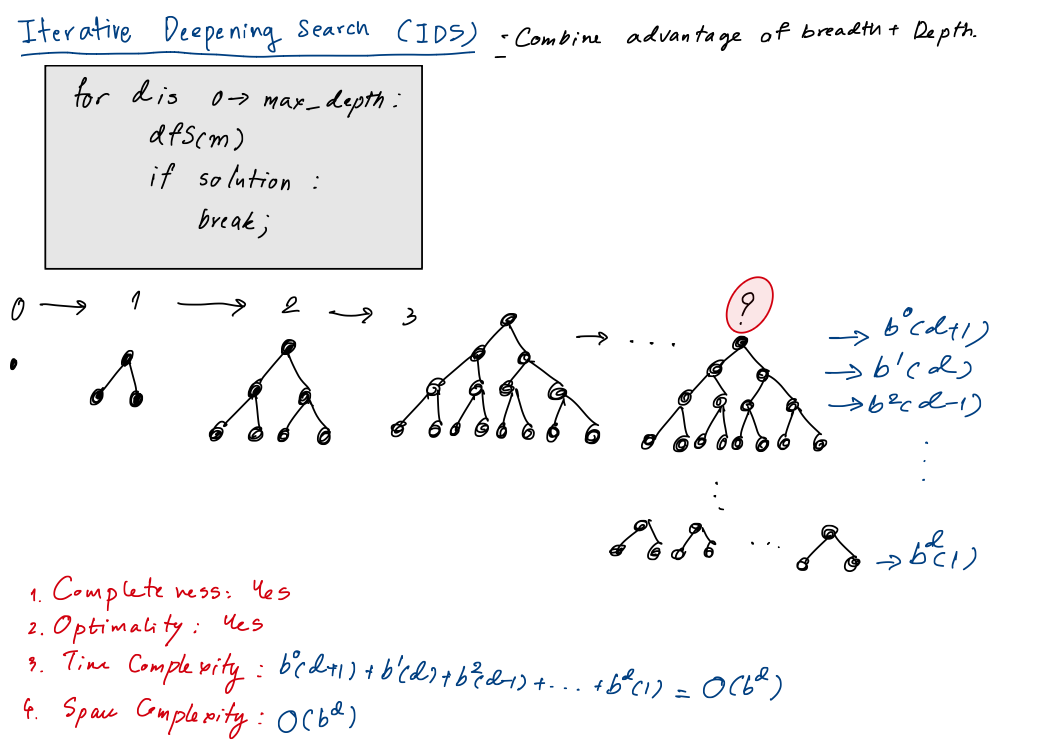

In [15]:
# IDS
for i in range(100):
    print('Limit at level '+str(i))
    if dfs(('S',0,-1,0),i):
        break

Limit at level 0
Initial fringe: [('S', 0, -1, 0)]
No solution
Limit at level 1
Initial fringe: [('S', 0, -1, 0)]
Updated fringe: [('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
No solution
Limit at level 2
Initial fringe: [('S', 0, -1, 0)]
Updated fringe: [('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Updated fringe: [('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Found Solution
G D S 

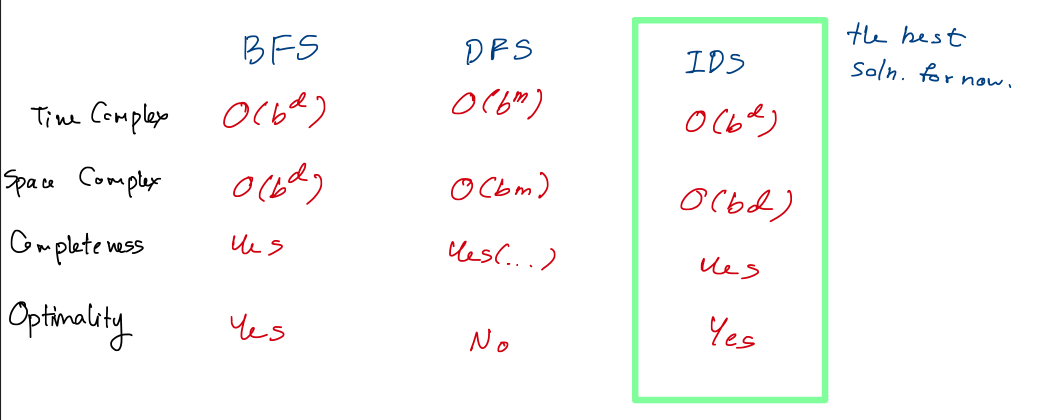

### 8 - Puzzle

#### BFS

In [17]:
last_index = 0
visited_node = {}
total_expanded_nodes = 0

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        # Move the blank left 
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        # Move the blank right
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        # Move the blank up
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        # Move the blank down
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret
    
def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
      fringe.append(child) 

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node,limited_level):
    global last_index
    global visited_node 
    global total_expanded_nodes
    
    last_index = 0
    fringe = [start_node]
    # print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front,visited_node)
            return True
        # if front[3] == limited_level:
        #     continue
        total_expanded_nodes += 1
        if total_expanded_nodes % 10000 == 0:
          print(f'Expanded {total_expanded_nodes} nodes')
        insert_all(front,fringe)

bfs(('6243576018',0,-1,0),0)



Expanded 10000 nodes
Expanded 20000 nodes
Expanded 30000 nodes
Expanded 40000 nodes
Expanded 50000 nodes
Expanded 60000 nodes
Expanded 70000 nodes
Expanded 80000 nodes
Expanded 90000 nodes
Expanded 100000 nodes
Expanded 110000 nodes
Expanded 120000 nodes
Expanded 130000 nodes
Expanded 140000 nodes
Expanded 150000 nodes
Expanded 160000 nodes
123
456
780

123
456
708

123
406
758

123
046
758

023
146
758

203
146
758

243
106
758

243
156
708

243
156
078

243
056
178

243
506
178

243
576
108

243
576
018



True

#### IDS

In [18]:
last_index = 0
visited_node = {}
total_expanded_nodes = 0

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        # Move the blank left 
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        # Move the blank right
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        # Move the blank up
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        # Move the blank down
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret
    
def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child] # fringe.append(child)
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node 
    global total_expanded_nodes 
    
    last_index = 0
    fringe = [start_node]
    # print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        # Put your code to find the number of expanded nodes 
        if is_goal(front):
            show_result(front,visited_node)
            return True
        if front[3] == limited_level:
            continue
        total_expanded_nodes += 1
        if total_expanded_nodes % 10000 == 0:
          print(f'Expanded {total_expanded_nodes} nodes')
        insert_all(front,fringe)

for i in range(20):
    print("Limit Search at level "+str(i+1))
    if dfs(('6243576018',0,-1,0),i):
        break


Limit Search at level 1
Not Found
Limit Search at level 2
Not Found
Limit Search at level 3
Not Found
Limit Search at level 4
Not Found
Limit Search at level 5
Not Found
Limit Search at level 6
Not Found
Limit Search at level 7
Not Found
Limit Search at level 8
Not Found
Limit Search at level 9
Not Found
Limit Search at level 10
Not Found
Limit Search at level 11
Expanded 10000 nodes
Expanded 20000 nodes
Not Found
Limit Search at level 12
Expanded 30000 nodes
Expanded 40000 nodes
Expanded 50000 nodes
Not Found
Limit Search at level 13
Expanded 60000 nodes
Expanded 70000 nodes
Expanded 80000 nodes
123
456
780

123
456
708

123
406
758

123
046
758

023
146
758

203
146
758

243
106
758

243
016
758

243
716
058

243
716
508

243
706
518

243
076
518

243
576
018

